<a href="https://colab.research.google.com/github/divyakathane/FDIP/blob/main/ASS_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

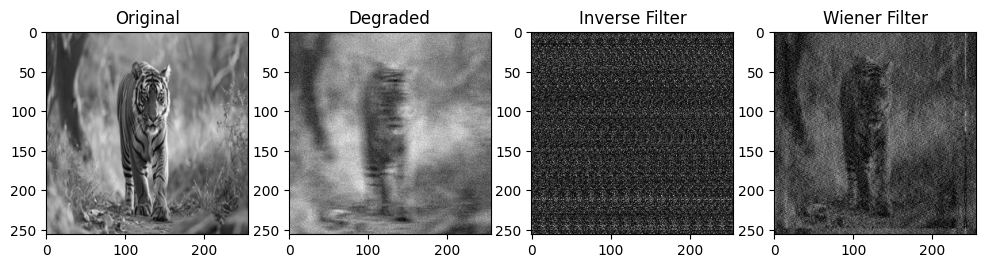

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Step 1: Read and Degrade Image ----------------
img = cv2.imread('/content/fdip pic.jpg', 0)  # read grayscale image
img = cv2.resize(img, (256, 256)) # resize for simplicity

# Create a motion blur kernel (PSF)
size = 15
psf = np.zeros((size, size))
psf[int(size/2), :] = np.ones(size)
psf = psf / size

# Blur the image
blurred = cv2.filter2D(img, -1, psf)

# Add Gaussian noise
noise = np.random.normal(0, 10, img.shape)
degraded = np.clip(blurred + noise, 0, 255)

# ---------------- Step 2: Apply Inverse Filter ----------------
# Convert to frequency domain
G = np.fft.fft2(degraded)
H = np.fft.fft2(psf, s=img.shape)

# Avoid division by zero
H[H == 0] = 1e-8

# Inverse filtering
F_inv = G / H
f_inv = np.abs(np.fft.ifft2(F_inv))

# ---------------- Step 3: Apply Wiener Filter ----------------
K = 0.01  # noise-to-signal ratio (adjust for effect)
H_conj = np.conj(H)
wiener_filter = (H_conj / (H * H_conj + K))
F_wiener = wiener_filter * G
f_wiener = np.abs(np.fft.ifft2(F_wiener))

# ---------------- Step 4: Display Results ----------------
plt.figure(figsize=(12,6))
plt.subplot(1,4,1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1,4,2), plt.imshow(degraded, cmap='gray'), plt.title('Degraded')
plt.subplot(1,4,3), plt.imshow(f_inv, cmap='gray'), plt.title('Inverse Filter')
plt.subplot(1,4,4), plt.imshow(f_wiener, cmap='gray'), plt.title('Wiener Filter')
plt.show()
